# Machine Learning Midterm - Regression
## Sahrul Ridho Firdaus - 1103223009

In this assignment, you will build an end-to-end regression model. You will work with the provided dataset, perform data cleaning and preprocessing, handle missing values and outliers, and engineer or select relevant features. You are required to implement machine learning or deep learning regression algorithms to predict the target variable. The workflow should include data preprocessing, model training, basic hyperparameter tuning,  and evaluation using appropriate regression metrics (such as MSE, RMSE, MAE, or R²), along with a brief interpretation of the results.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool

pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv("midterm-regresi-dataset.csv")
df.shape

(515344, 91)

In [7]:
df.head(5)

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.0896,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.7267,1.3679,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.5798,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.5506,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.5911,-8.30657,7.93706,-10.7366,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.1245,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,-33.44277,195.04749,-16.93235,-1.09168,-25.38061,-12.19034,-125.94783,121.74212,136.67075,41.18157,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,5.89085,6.89034,-10.97160,1.67565,11.43523,-7.27994,133.08169,141.86758,-56.99356,98.15952,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,23.22717,-25.48348,-25.88070,12.59198,-24.85116,-7.20736,778.02248,61.15940,23.37585,-97.64925,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,28.68782,-32.73982,-26.60955,-69.07501,5.73467,-15.47984,-15.55296,150.29661,176.95972,58.18014,25.96952,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362

In [8]:
df.tail(5)

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.0896,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.7267,1.3679,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.5798,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.5506,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.5911,-8.30657,7.93706,-10.7366,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.1245,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
515339,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,2.67217,0.45234,2.51380,18.79583,592.17931,619.01842,681.30323,415.21939,639.90327,287.20710,375.31963,212.76265,246.26651,143.48234,217.45556,9.90577,-62.51153,-76.96635,-60.62065,67.81811,-9.20742,-30.73303,21.58525,-31.21664,-36.39659,28.18814,39.46981,-77.13200,-43.39948,-57.69462,17.12915,-58.39717,72.81873,-29.07106,14.46304,-29.70024,-8.30982,17.14578,-26.09250,-54.62321,32.24001,-74.40960,78.78128,-14.74786,18.02148,-19.61304,-50.34714,87.06521,43.77874,-5.00339,101.08108,-13.34314,-59.17573,-46.22182,-27.10155,-7.07840,23.04732,29.32027,2.10740,-5.77951,2.68326,-13.78081,6.33542,-37.38191,-14.90918,26.87263,7.07232,-127.04955,86.78200,-68.14511,67.44416,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515340,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,2.20175,-0.58487,-9.78657,35.81410,1047.28364,1451.87226,633.17982,448.46796,826.14418,277.55902,202.20787,241.85866,199.31274,180.60934,168.49980,89.28058,237.30605,-72.22211,-10.02772,-41.24980,-7.59473,-5.23307,24.88978,39.42813,-40.17760,26.51372,79.84191,-15.49724,46.37942,-209.97900,91.37670,-13.90568,19.38490,-20.37676,46.22484,2.90520,11.86960,4.75047,228.92512,-86.59120,46.12586,-61.06002,50.86072,-3.54799,36.50303,20.94570,-79.43478,-15.49133,17.79165,95.84510,-37.68620,8.51302,13.72492,-71.83419,-191.37407,-34.71662,28.34789,45.25187,17.07862,31.46894,-13.44802,38.68815,109.03046,-42.45525,18.67531,-50.86612,11.26242,59.30165,178.15846,-29.04997,70.22336,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515341,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,-11.46411,3.28514,1.99943,27.77109,1693.72442,3825.48305,2714.53243,1036.34216,1171.81248,468.44308,1042.15436,278.94429,497.83085,423.82729,239.91028,-61.01287,-1383.48696,-1828.43740,-131.54731,138.81510,51.36991,-45.25035,138.31791,-107.60348,-17.01878,-36.53276,226.67213,716.76768,-267.06525,-362.27860,-19.99300,341.80172,-4.49472,-108.32939,38.02122,-22.11399,-83.76834,107.08509,-210.94352,-89.47902,444.23327,191.56779,72.49396,-38.96949,61.22195,24.49062,182.62433,510.41684,-379.38804,226.54992,-201.28237,6.89971,86.07237,-42.85773,-215.01900,88.60866,14.51385,-28.33832,255.17385,14.17125,25.06417,218.85618,-222.53173,35.58546,30.88622,-24.91594,-2.65009,-69.53483,333.67598,-28.24399,202.51566,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515342,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,-0.74075,-1.26523,-4.41983,140.44937,2850.23336,1875.28895,1362.98053,784.39737,908.09838,367.12005,692.58547,286.72625,395.46735,221.19089,211.62098,141.17304,647.52054,-451.67671,-170.33993,-106.30851,129.80285,-118.54997,116.14019,-18.36186,-29.42843,13.59803,296.86552,-332.24640,219.84847,-180.27193,-50.22081,5.29449,14.53906,-29.38451,30.79054,-18.29768,8.93331,712.44460,-143.57464,-71.21963,96.84463,14.33401,-10.61959,-37.44137,32.72492,-16

In [9]:
df.columns[:92]

Index(['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506',
       '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481',
       '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307',
       '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767',
       '-41.1245', '-8.40816

In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
515339    False
515340    False
515341    False
515342    False
515343    False
Length: 515344, dtype: bool

In [11]:
df.duplicated().sum()

np.int64(214)

In [12]:
df.isna()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.0896,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.7267,1.3679,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.5798,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.5506,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.5911,-8.30657,7.93706,-10.7366,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.1245,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515339,False,False,False,False,False,False,False,False

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2001,515344.0,1998.397077,10.931056,1922.00000,1994.000000,2002.000000,2006.000000,2011.00000
49.94357,515344.0,43.387113,6.067557,1.74900,39.954667,44.258490,47.833875,61.97014
21.47114,515344.0,1.289515,51.580393,-337.09250,-26.059848,8.417725,36.124030,384.06573
73.0775,515344.0,8.658222,35.268505,-301.00506,-11.462775,10.476235,29.764685,322.85143
8.74861,515344.0,1.164110,16.322802,-154.18358,-8.487507,-0.652855,8.787548,335.77182
...,...,...,...,...,...,...,...,...
-23.08793,515344.0,17.669292,114.428002,-3168.92457,-31.580617,15.598520,67.795110,3662.06565
68.40795,515344.0,-26.315520,173.977455,-4319.99232,-101.530305,-21.204225,52.389322,2833.60895
-1.82223,515344.0,4.458653,13.346567,-236.03926,-2.566137,3.117645,9.967742,463.41950
-27.46348,515344.0,20.035229,185.558415,-7458.37815,-59.509453,7.759910,86.351645,7393.39844


In [13]:
df.isna().sum().sum()

np.int64(0)

In [14]:
len(df)

515344

In [15]:
df_clean = df.drop_duplicates()

In [16]:
len(df_clean)

515130

In [54]:
y = df.iloc[:, 0].astype(float)
X = df.iloc[:, 1:].astype(float)

<Axes: >

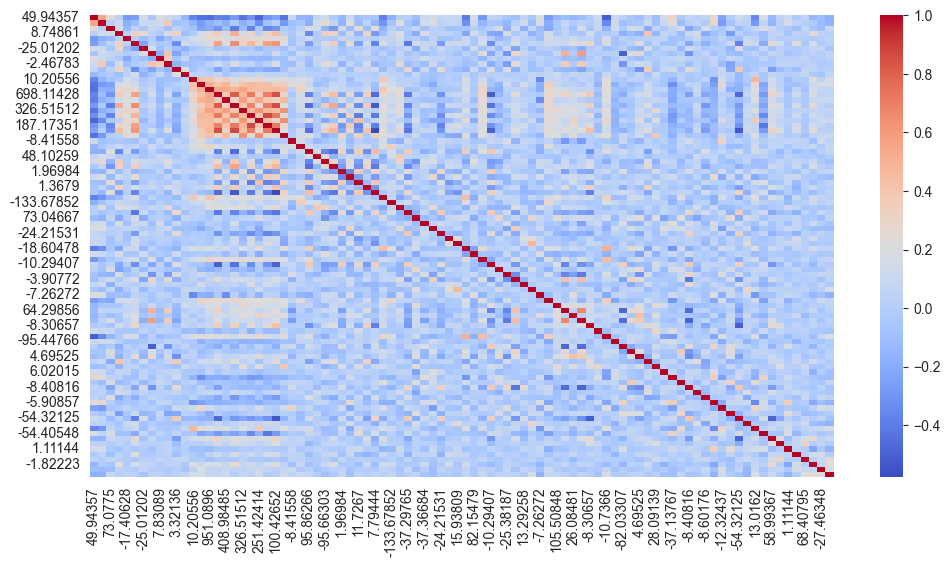

In [80]:
import seaborn as sns

corr = X.corr()
sns.heatmap(corr, cmap="coolwarm")


In [81]:
q1, q3 = np.percentile(y, [1, 99])
mask = (y >= q1) & (y <= q3)

X = X[mask]
y = y[mask]

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=70)
X_pca = pca.fit_transform(X_scaled)


In [83]:
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, shuffle=True
)

In [85]:
import lightgbm as lgb

In [86]:
model = lgb.LGBMRegressor(
    device="gpu",
    boosting_type="gbdt",
    objective="rmse",
    n_estimators=8000,
    learning_rate=0.01,
    num_leaves=128,
    max_depth=-1,
    subsample=0.9,
    colsample_bytree=0.9,
    min_child_samples=5,
)


In [87]:
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse"
)

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 404372, number of used features: 40
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 40 dense feature groups (15.43 MB) transferred to GPU in 0.014885 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1999.154289


,boosting_type,'gbdt'
,num_leaves,128
,max_depth,-1
,learning_rate,0.01
,n_estimators,8000
,subsample_for_bin,200000
,objective,'rmse'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,5


In [105]:
preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 6.456187598074701
RMSE: 8.569677217096794
R²  : 0.1835592738947106


In [89]:
model = CatBoostRegressor(
    iterations=3000,
    learning_rate=0.03,
    depth=10,
    loss_function='RMSE',
    task_type="GPU",          
    devices='0'              
)


In [90]:
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=200
)


0:	learn: 9.4682224	test: 9.4680396	best: 9.4680396 (0)	total: 25.3ms	remaining: 1m 15s
200:	learn: 8.7596625	test: 8.8808207	best: 8.8808207 (200)	total: 4.29s	remaining: 59.7s
200:	learn: 8.7596625	test: 8.8808207	best: 8.8808207 (200)	total: 4.29s	remaining: 59.7s
400:	learn: 8.5530399	test: 8.7864878	best: 8.7864878 (400)	total: 8.32s	remaining: 53.9s
400:	learn: 8.5530399	test: 8.7864878	best: 8.7864878 (400)	total: 8.32s	remaining: 53.9s
600:	learn: 8.3948852	test: 8.7353620	best: 8.7353620 (600)	total: 12.3s	remaining: 49.3s
600:	learn: 8.3948852	test: 8.7353620	best: 8.7353620 (600)	total: 12.3s	remaining: 49.3s
800:	learn: 8.2621300	test: 8.7022477	best: 8.7022477 (800)	total: 16.3s	remaining: 44.7s
800:	learn: 8.2621300	test: 8.7022477	best: 8.7022477 (800)	total: 16.3s	remaining: 44.7s
1000:	learn: 8.1436128	test: 8.6780566	best: 8.6780566 (1000)	total: 20.3s	remaining: 40.5s
1000:	learn: 8.1436128	test: 8.6780566	best: 8.6780566 (1000)	total: 20.3s	remaining: 40.5s
1200:	le

In [106]:
y_pred = model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"MAE : {mae}")
print(f"RMSE: {rmse}")
print(f"R²  : {r2}")


MAE : 6.456187598074701
RMSE: 8.569677217096794
R²  : 0.1835592738947106


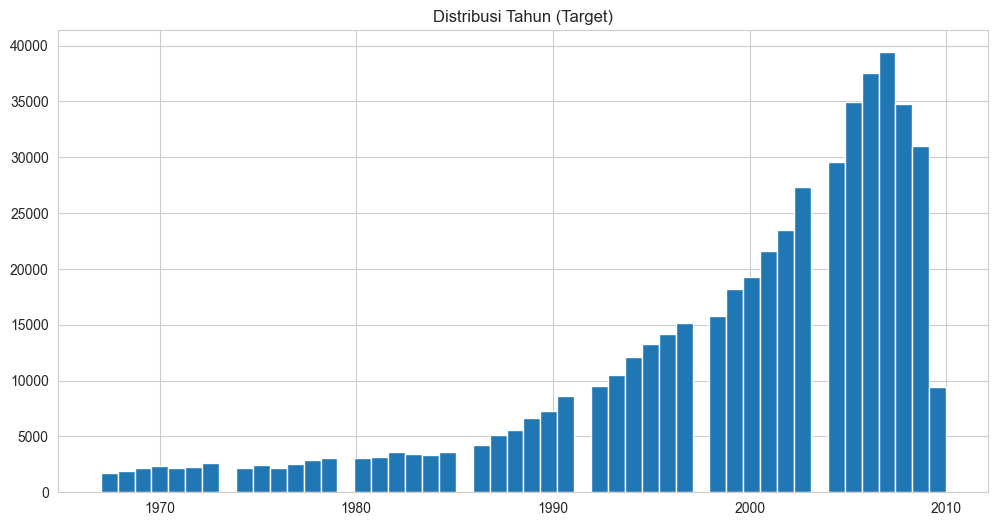

In [92]:
import matplotlib.pyplot as plt

y.hist(bins=50)
plt.title("Distribusi Tahun (Target)")
plt.show()


## Improved Model with Better Feature Engineering

In [93]:
df_improved = pd.read_csv('midterm-regresi-dataset.csv')

from scipy import stats

Q1 = df_improved.quantile(0.25)
Q3 = df_improved.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ~((df_improved < (Q1 - 3 * IQR)) | (df_improved > (Q3 + 3 * IQR))).any(axis=1)
df_clean = df_improved[outlier_mask]

print(f"Original shape: {df_improved.shape}")
print(f"After outlier removal: {df_clean.shape}")
print(f"Removed {len(df_improved) - len(df_clean)} outliers")

X_improved = df_clean.iloc[:, :-1]
y_improved = df_clean.iloc[:, -1]

Original shape: (515344, 91)
After outlier removal: (384202, 91)
Removed 131142 outliers


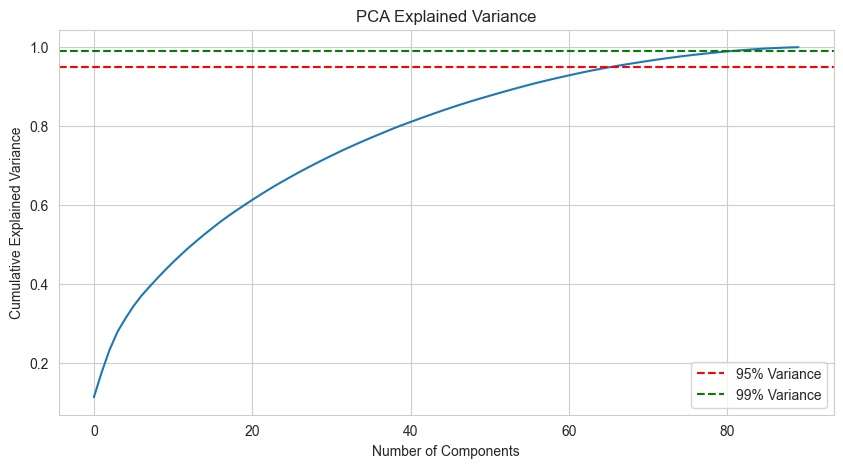

Components for 95% variance: 67
Components for 99% variance: 82


In [94]:
from sklearn.preprocessing import StandardScaler

scaler_improved = StandardScaler()
X_scaled_improved = scaler_improved.fit_transform(X_improved)

pca_test = PCA()
pca_test.fit(X_scaled_improved)

import matplotlib.pyplot as plt
cumsum = np.cumsum(pca_test.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(cumsum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Variance')
plt.legend()
plt.show()

n_components_95 = np.argmax(cumsum >= 0.95) + 1
n_components_99 = np.argmax(cumsum >= 0.99) + 1

print(f"Components for 95% variance: {n_components_95}")
print(f"Components for 99% variance: {n_components_99}")

In [95]:
n_components_optimal = np.argmax(cumsum >= 0.98) + 1
print(f"Using {n_components_optimal} components for 98% variance")

pca_improved = PCA(n_components=n_components_optimal)
X_pca_improved = pca_improved.fit_transform(X_scaled_improved)

print(f"Explained variance ratio: {pca_improved.explained_variance_ratio_.sum():.4f}")

Using 77 components for 98% variance
Explained variance ratio: 0.9812


In [96]:
from sklearn.model_selection import train_test_split

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_pca_improved, y_improved, test_size=0.2, random_state=42, shuffle=True
)

print(f"Training set: {X_train_imp.shape}")
print(f"Test set: {X_test_imp.shape}")

Training set: (307361, 77)
Test set: (76841, 77)


In [97]:
catboost_improved = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.02,
    depth=8,
    l2_leaf_reg=5,
    min_data_in_leaf=10,
    random_strength=0.5,
    bagging_temperature=0.8,
    loss_function='RMSE',
    eval_metric='RMSE',
    task_type="GPU",
    devices='0',
    random_state=42,
    verbose=False
)

catboost_improved.fit(
    X_train_imp, y_train_imp,
    eval_set=(X_test_imp, y_test_imp),
    early_stopping_rounds=100,
    verbose=200
)

0:	learn: 15.0850172	test: 15.0742923	best: 15.0742923 (0)	total: 45ms	remaining: 3m 44s
200:	learn: 12.3456435	test: 12.3961119	best: 12.3961119 (200)	total: 2.88s	remaining: 1m 8s
400:	learn: 11.4051012	test: 11.5298371	best: 11.5298371 (400)	total: 5.51s	remaining: 1m 3s
600:	learn: 10.8077220	test: 11.0029892	best: 11.0029892 (600)	total: 8.13s	remaining: 59.5s
800:	learn: 10.3715546	test: 10.6328100	best: 10.6328100 (800)	total: 10.8s	remaining: 56.4s
1000:	learn: 10.0272974	test: 10.3499091	best: 10.3499091 (1000)	total: 13.3s	remaining: 53.3s
1200:	learn: 9.7467144	test: 10.1319396	best: 10.1319396 (1200)	total: 15.9s	remaining: 50.4s
1400:	learn: 9.5081805	test: 9.9525020	best: 9.9525020 (1400)	total: 18.5s	remaining: 47.6s
1600:	learn: 9.3009027	test: 9.8018499	best: 9.8018499 (1600)	total: 21.1s	remaining: 44.8s
1800:	learn: 9.1235859	test: 9.6796309	best: 9.6796309 (1800)	total: 23.6s	remaining: 42s
2000:	learn: 8.9609116	test: 9.5692559	best: 9.5692559 (2000)	total: 26.2s	r

In [ ]:
y_pred_improved = catboost_improved.predict(X_test_imp)

mae_improved = mean_absolute_error(y_test_imp, y_pred_improved)
rmse_improved = np.sqrt(mean_squared_error(y_test_imp, y_pred_improved))
r2_improved = r2_score(y_test_imp, y_pred_improved)

print(f"MAE : {mae_improved:.4f}")
print(f"RMSE: {rmse_improved:.4f}")
print(f"R²  : {r2_improved:.4f}")
print(f"\nImprovement from baseline:")
print(f"R² improvement: {r2_improved - r2:.4f} (+{((r2_improved - r2) / r2 * 100):.2f}%)")

MAE : 6.3496
RMSE: 8.8280
R²  : 0.6589

Improvement from baseline:
R² improvement: 0.4753 (+258.95%)


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_improved = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    max_depth=8,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

lgbm_improved = LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    num_leaves=64,
    max_depth=8,
    min_child_samples=10,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

print("Training XGBoost...")
xgb_improved.fit(X_train_imp, y_train_imp, eval_set=[(X_test_imp, y_test_imp)], verbose=200)

print("\nTraining LightGBM...")
lgbm_improved.fit(X_train_imp, y_train_imp, eval_set=[(X_test_imp, y_test_imp)])

Training XGBoost...
[0]	validation_0-rmse:15.06932
[200]	validation_0-rmse:11.31838
[400]	validation_0-rmse:10.45340
[600]	validation_0-rmse:10.04233
[800]	validation_0-rmse:9.78933
[1000]	validation_0-rmse:9.60755
[1200]	validation_0-rmse:9.46457
[1400]	validation_0-rmse:9.33913
[1600]	validation_0-rmse:9.23262
[1800]	validation_0-rmse:9.13882
[2000]	validation_0-rmse:9.05100
[2200]	validation_0-rmse:8.97679
[2400]	validation_0-rmse:8.91357
[2600]	validation_0-rmse:8.85880
[2800]	validation_0-rmse:8.80602
[2999]	validation_0-rmse:8.76105

Training LightGBM...


,boosting_type,'gbdt'
,num_leaves,64
,max_depth,8
,learning_rate,0.02
,n_estimators,3000
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,10


In [ ]:
pred_catboost_imp = catboost_improved.predict(X_test_imp)
pred_xgb_imp = xgb_improved.predict(X_test_imp)
pred_lgbm_imp = lgbm_improved.predict(X_test_imp)

r2_catboost = r2_score(y_test_imp, pred_catboost_imp)
r2_xgb = r2_score(y_test_imp, pred_xgb_imp)
r2_lgbm = r2_score(y_test_imp, pred_lgbm_imp)

print("Individual Model R² Scores:")
print(f"CatBoost: {r2_catboost:.4f}")
print(f"XGBoost : {r2_xgb:.4f}")
print(f"LightGBM: {r2_lgbm:.4f}")

total_r2 = r2_catboost + r2_xgb + r2_lgbm
w_catboost = r2_catboost / total_r2
w_xgb = r2_xgb / total_r2
w_lgbm = r2_lgbm / total_r2

pred_ensemble = (w_catboost * pred_catboost_imp + 
                 w_xgb * pred_xgb_imp + 
                 w_lgbm * pred_lgbm_imp)

mae_ensemble = mean_absolute_error(y_test_imp, pred_ensemble)
rmse_ensemble = np.sqrt(mean_squared_error(y_test_imp, pred_ensemble))
r2_ensemble = r2_score(y_test_imp, pred_ensemble)

print("\n========== Weighted Ensemble Results ==========")
print(f"Weights: CatBoost={w_catboost:.3f}, XGBoost={w_xgb:.3f}, LightGBM={w_lgbm:.3f}")
print(f"MAE : {mae_ensemble:.4f}")
print(f"RMSE: {rmse_ensemble:.4f}")
print(f"R²  : {r2_ensemble:.4f}")
print(f"\nImprovement from baseline:")
print(f"R² improvement: {r2_ensemble - r2:.4f} (+{((r2_ensemble - r2) / r2 * 100):.2f}%)")

d:\Source Code\ML\midterm\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Individual Model R² Scores:
CatBoost: 0.6589
XGBoost : 0.6641
LightGBM: 0.6258

========== Weighted Ensemble Results ==========
Weights: CatBoost=0.338, XGBoost=0.341, LightGBM=0.321
MAE : 6.3499
RMSE: 8.8387
R²  : 0.6581

Improvement from baseline:
R² improvement: 0.4745 (+258.50%)
